# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Dataset\\Social_Network_Ads.csv')

In [3]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**About Dataset**

The dataset contain information of user on social network.The information given here are userId,Gender,Age,EstimatedSalary and Purchased. And this social_network has several buisness clients which can put their ads on the social network.Last column cocludes whether a user is going to buy the product or not.

We are going to build a model that is going to predict if a user is going to buy or not the product based on two variables which are going to **age** & **estimated salary** 

In [4]:
X = dataset.iloc[:,[2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
X[:5,]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [6]:
y[:10,]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
print('Length of X_train & y_train = ',len(X_train),'and length of X_test & y_test = ',len(X_test))

Length of X_train & y_train =  300 and length of X_test & y_test =  100


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train[:5,:]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

# Fitting Logistic Regression to the training set

The library is going to be linear model library because logistic regression is a linear classifier which means that we are in two dimensions, our two categories of user are going to be separated by a straight line.

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

In [12]:
classifier.fit(X_train,y_train)

C:\Users\Samir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#Predicting the test set result
y_pred = classifier.predict(X_test)

**Confusion Matrix**


We compute Confusion Matrix to evaluate the accuracy of a classification.

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

**y_true** : Ground truth (correct) target values.

**y_pred** : Estimated targets as returned by a classifier.

**labels** : (optional)List of labels to index the matrix. This may be used to reorder or select a subset of labels.If none is given, those that appear at least once in ``y_true`` or ``y_pred`` are used in sorted order.

**sample_weight** :optional sample weights.

In [14]:
#Making confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [15]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

65 and 24 are the correct predictions. And 8 and 3 are incorrect predictions.

Total correct predictions = 65+24=89

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


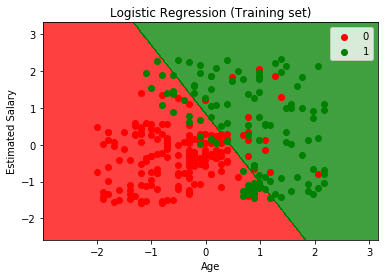

In [16]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


**Analysis**

We have some red and green points.All the point which we see in the graph are the observation point of the training set.On the X-axis lies `Age` and on the y-axis lies `Estimated Salary`.


In first we can see some red points and in the other half we can see some green points.
The red points are the training set observation for which the dependent variable(purchase) is equal to 0 and the green points are the training set observations for which the dependent variable(purchase) is equal to 1.

The users in the first half didn't buy the product whereas in the second half the user have bought the product.

1)The Users who were of less age and less salary didn't buy the product.

2)We can also see that the older people with low estimated salary also bought the product.

3)There are young users with high estimated salary have also bought the product.

The point is the truth and the reason is the prediction.

The straight line which separates the two regions is known as prediction boundary.
The prediction boundary is straight because the classifier is linear classifier 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


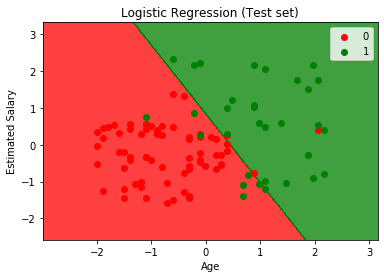

In [17]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Point(11 points) located in the opposite colour region are the incorrect predictions we saw in the confusion matrix.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


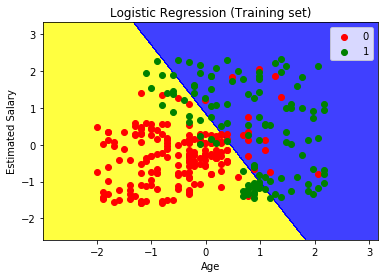

In [29]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()